# Understanding Classification Model Performance Metrics

__Team Members:__ Surya Suresh Sriraman, Nivetha Sivakumar, Aravind Raju

# Introduction

In this work we will develop and demonstrate our understanding of the classification model performance metrics. We will be using a dataset that has actual and predicted class binary columns.

__Approach:__<br>
- __Data Loading:__ Utilize Python and the Pandas library to load the data into a suitable DataFrame.
- __Create Crosstab:__ Use pandas functions to create crosstab.
- __Create Custom Functions:__ Create custom functions using python to calculate different performance metrics.
- __Compare with built-in Functions:__ Comapre the output of custom functions and pre-built functions. 

# Import libraries

In [21]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score,roc_auc_score, roc_curve, auc, classification_report, confusion_matrix

# Data Loading [1,2]

In [22]:
data = pd.read_csv("https://raw.githubusercontent.com/nivethasivakumar75/DAV-6150-2/main/M5_Data.csv")
data.head()

,pregnant,glucose,diastolic,skinfold,insulin,bmi,pedigree,age,class,scored.class,scored.probability
0,7,124,70,33,215,25.5,0.161,37,0,0,0.328452
1,2,122,76,27,200,35.9,0.483,26,0,0,0.273190
2,3,107,62,13,48,22.9,0.678,23,1,0,0.109660
3,1,91,64,24,0,29.2,0.192,21,0,0,0.055998
4,4,83,86,19,0,29.3,0.317,34,0,0,0.100491


# Create Crosstab [3]

In [23]:
#create crosstab between actual and predicted
ct = pd.crosstab(data["class"], data["scored.class"], rownames = ["Actual"], colnames = ["Predicted"])
ct

Predicted,0,1
Actual,,
0,119,5
1,30,27


In [24]:
#check using value_counts function
data["class"].value_counts()

0    124
1     57
Name: class, dtype: int64

Actual values are matching with sum across the rows  of the crosstab

In [25]:
#check using value count function
data["scored.class"].value_counts()

0    149
1     32
Name: scored.class, dtype: int64

Predicted values are matching with sum across the columns  of the crosstab

# Save the crosstab results in a data sturcture (dictionary) [4]

In [26]:
ct_dict = {"True Positive"  : ct.iloc[1,1],
           "True Negative"  : ct.iloc[0,0],
           "False Positive" : ct.iloc[0,1],
           "False Negative" : ct.iloc[1,0]}

ct_dict

{'True Positive': 27,
 'True Negative': 119,
 'False Positive': 5,
 'False Negative': 30}

# Create functions to calculate model performance metrics

## Confusion Matrix

In [27]:
def get_confusion_matrix(actual, predicted):
    """
    Compute Cross tab forgiven actual and predicted values.

    Parameters:
        actual : Actual labels.
        predicted : Predicted labels.

    Returns:
        Dictionary: Values of confusion matrix.
    """
    
    ct = pd.crosstab(actual, predicted, rownames=["Actual"], colnames=["Predicted"])

    return ct

In [28]:
def get_cm_values(confusion_matrix):
    
    ct_dict = {
        "True Positive": ct.iloc[1, 1],
        "True Negative": ct.iloc[0, 0],
        "False Positive": ct.iloc[0, 1],
        "False Negative": ct.iloc[1, 0]
    }
    
    return ct_dict    

## Accuracy [5]

In [29]:
def get_accuracy(actual, predicted):
    """
    Calculate accuracy metric given actual and predicted values.

    Parameters:
        actual : Actual labels.
        predicted : Predicted labels.

    Returns:
        float: Accuracy of the model.
    """
    ct_dict = get_cm_values(get_confusion_matrix(actual, predicted))

    # Calculate accuracy
    accuracy = (ct_dict["True Positive"] + ct_dict["True Negative"]) / (ct_dict["True Positive"] + ct_dict["True Negative"] + ct_dict["False Positive"] + ct_dict["False Negative"])

    return accuracy


## Precision [6]

In [30]:
def get_precision(actual, predicted):
    """
    Calculate precision metric given actual and predicted values.

    Parameters:
        actual: Actual labels.
        predicted: Predicted labels.

    Returns:
        float: Precision of the model.
    """
    ct_dict = get_cm_values(get_confusion_matrix(actual, predicted))

    # Calculate precision
    precision = ct_dict["True Positive"] / (ct_dict["True Positive"] + ct_dict["False Positive"])

    return precision


## Sensitivity [7]

In [31]:
def get_sensitivity(actual, predicted):
    """
    Calculate Sensitivity metric given actual and predicted values.

    Parameters:
        actual: Actual labels.
        predicted: Predicted labels.

    Returns:
        float: Sensitivity of the model.
    """
    ct_dict = get_cm_values(get_confusion_matrix(actual, predicted))
    
    # Calculate sensitivity
    sensitivity = ct_dict["True Positive"] / (ct_dict["True Positive"] + ct_dict["False Negative"])

    return sensitivity


## Specificity [8]

In [32]:
def get_specificity(actual, predicted):
    """
    Calculate the specificity metric given actual and predicted values.

    Specificity measures the proportion of actual negative cases that are correctly identified as negative by the classifier.

    Parameters:
        actual: The actual labels.
        predicted: The predicted labels.

    Returns:
        float: The specificity of the model.
    """
    ct_dict = get_cm_values(get_confusion_matrix(actual, predicted))

    # Calculate the specificity using the formula: TN / (TN + FP)
    specificity = ct_dict["True Negative"] / (ct_dict["True Negative"] + ct_dict["False Positive"])
    
    return specificity


## f1-score metric [9]

In [33]:
def get_f1_score(actual, predicted):
    """
    Calculate the F1 score metric given actual and predicted values.

    Parameters:
        actual: The actual labels.
        predicted: The predicted labels.

    Returns:
        float: The F1 score of the model.
    """
    
    # Calculate precision and recall using custom functions
    precision = get_precision(actual, predicted)
    recall = get_sensitivity(actual, predicted)
    
    # Calculate the F1 score using the formula: 2 / ((1 / precision) + (1 / recall))
    f1_score = 2 / ((1 / precision) + (1 / recall))
    
    return f1_score


## ROC and AUC [10]

In [34]:
def get_roc_auc(actual, predicted):
    """
    Calculate the Area Under the Curve (AUC) for Receiver Operating Characteristic (ROC) given actual and predicted values.

    Parameters:
        actual: The actual labels.
        predicted: The predicted labels.

    Returns:
        float: The Area Under the Curve (AUC) of the ROC curve.
    """
    ct_dict = get_cm_values(get_confusion_matrix(actual, predicted))

    # Calculate True Positive Rate (TPR) and False Positive Rate (FPR)
    tpr = ct_dict["True Positive"] / (ct_dict["True Positive"] + ct_dict["False Negative"])
    fpr = ct_dict["False Positive"] / (ct_dict["False Positive"] + ct_dict["True Negative"])
    
    # Define points for plotting ROC curve
    fpr_list = [0, fpr, 1]
    tpr_list = [0, tpr, 1]

    # Calculate AUC using trapezoidal rule
    auc = round(sum([(fpr_list[i+1] - fpr_list[i]) * (tpr_list[i] + tpr_list[i+1]) / 2 for i in range(len(fpr_list)-1)]), 2)

    # Plot ROC curve
    plt.plot(fpr_list, tpr_list)
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve with custom function')
    plt.show()
    print("AUC with custom function:", auc)
    
    return auc


# Apply the custom made functions [11]

In [35]:
# Calculate metrics using custom functions and round them to two decimal places
print(f'Accuracy: {get_accuracy(data["class"], data["scored.class"]).round(4)}')
print(f'Precision: {get_precision(data["class"], data["scored.class"]).round(4)}')
print(f'Sensitivity: {get_sensitivity(data["class"], data["scored.class"]).round(4)}')
print(f'Specificity: {get_specificity(data["class"], data["scored.class"]).round(4)}')
print(f'f1_score: {get_f1_score(data["class"], data["scored.class"]).round(4)}')

Accuracy: 0.8066
Precision: 0.8438
Sensitivity: 0.4737
Specificity: 0.9597
f1_score: 0.6067


# Compare with pre-built functions [12]

## Confusion Matrix

In [36]:
print('Pre-built function:')
display(confusion_matrix(data["class"], data["scored.class"]))

print('Custom Function:')
display(get_confusion_matrix(data["class"], data["scored.class"]))

Pre-built function:


array([[119,   5],
       [ 30,  27]], dtype=int64)

Custom Function:


Predicted,0,1
Actual,,
0,119,5
1,30,27


The values are matching. The built-in function gives output in the form of array and the custom fuction gives output in the form of dataframe.

## accuracy_score(), precision_score(), recall_score(), f1_score()

In [37]:
# Create an empty DataFrame with the desired index
result = pd.DataFrame()

# Calculate metrics using custom functions and round them to two decimal places
result.loc["custom function", "accuracy"] = round(get_accuracy(actual=data["class"], predicted=data["scored.class"]), 2)
result.loc["custom function", "precision"] = round(get_precision(actual=data["class"], predicted=data["scored.class"]), 2)
result.loc["custom function", "sensitivity"] = round(get_sensitivity(actual=data["class"], predicted=data["scored.class"]), 2)
result.loc["custom function", "f1_score"] = round(get_f1_score(actual=data["class"], predicted=data["scored.class"]), 2)


result.loc["pre built function", "accuracy"] = round(accuracy_score(data["class"], data["scored.class"]), 2)
result.loc["pre built function", "precision"] = round(precision_score(data["class"], data["scored.class"]), 2)
result.loc["pre built function", "sensitivity"] = round(recall_score(data["class"], data["scored.class"]), 2)
result.loc["pre built function", "f1_score"] = round(f1_score(data["class"], data["scored.class"]), 2)

# Display the DataFrame
result

,accuracy,precision,sensitivity,f1_score
custom function,0.81,0.84,0.47,0.61
pre built function,0.81,0.84,0.47,0.61


Both the output values from in-built and custom funciton are matching.

## Classification Report

In [38]:
print(classification_report(data["class"], data["scored.class"]))

              precision    recall  f1-score   support

           0       0.80      0.96      0.87       124
           1       0.84      0.47      0.61        57

    accuracy                           0.81       181
   macro avg       0.82      0.72      0.74       181
weighted avg       0.81      0.81      0.79       181



__Insights__ : Both custom-made and built in function show almost identical results for all metrics. This suggests that your custom function is accurately replicating the calculations performed by the built-in functions.

# Compare ROC and AUC functions [13]

## Calculate ROC and AUC using built in functions

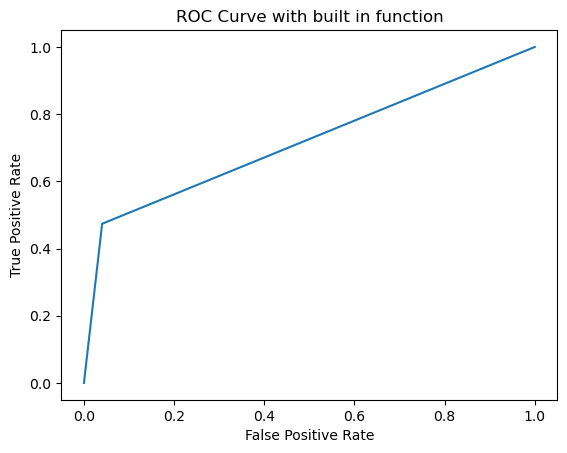

AUC with built in function: 0.72


In [39]:
# Calculate false positive rate, true positive rate, and thresholds
fpr, tpr, thresholds = roc_curve(data['class'], data['scored.class'])

# Plot ROC curve
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve with built in function')
plt.show()

# Calculate AUC
auc = round(roc_auc_score(data['class'], data['scored.class']), 2)
print('AUC with built in function:', auc)

## Calculate ROC and AUC using custom functions

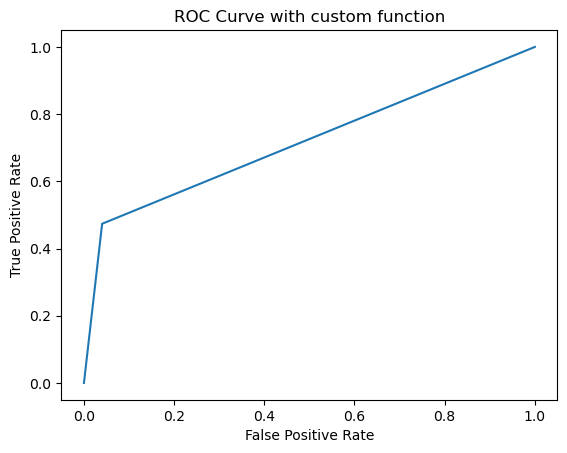

AUC with custom function: 0.72


0.72

In [40]:
#roc and auc calculation using custom function
get_roc_auc(actual = data['class'], predicted = data['scored.class'])

__Insights__ : Both custom-made and built in function shows identical results for ROC plot and AUC value. This suggests that our custom function accurately replicates the calculations performed by the built-in functions.

# Conclusion

In conclusion, we have created several custom functions to calculate the classification model performance metrics and compared the output with the output of the pre-built functionts. All the values were matching, suggesting that our custom function accurately replicates the calculations performed by the built-in functions.